# Práctica 3:
## Parte 1: Resolver ejercicios de:
+ 2_interpolación
+ 3_minimos_cuadrados
+ 4_SVD_y_reconstrucción_de_imágenes


### 2.-Interpolación:

**Ejercicio: Interpolar con 10 puntos generados de la función de [Runge](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.**

#### Usando Polyfit para el polinomio interpolador:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

runge = lambda x: 1/(1+(25*(x**2)))
intervalo_inicio = -1
intervalo_fin = 1
n_puntos = 10

In [2]:
equises_10_puntos = np.linspace(intervalo_inicio,intervalo_fin,n_puntos)
print(equises_10_puntos)

[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]


In [3]:
ys_runge_10_puntos = runge(equises_10_puntos)
print(ys_runge_10_puntos)

[0.03846154 0.06202144 0.11473088 0.26470588 0.76415094 0.76415094
 0.26470588 0.11473088 0.06202144 0.03846154]


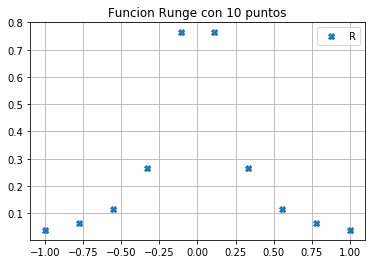

In [4]:
plt.plot(equises_10_puntos,ys_runge_10_puntos,"X")

plt.title("Funcion Runge con 10 puntos")
plt.legend(("Runge"),loc = 0) #Agregar leyendas en loc. 3
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

In [5]:
ngrado = n_puntos -1
coeficientes = np.polyfit(equises_10_puntos,ys_runge_10_puntos,ngrado)
np.set_printoptions(precision = 4) #que se muestren sólo cuatro decimales
pprint.pprint(coeficientes)

array([ 1.5062e-13,  2.1625e+01, -2.8962e-13, -4.4915e+01,  1.6650e-13,
        3.0729e+01, -2.5818e-14, -8.2609e+00,  0.0000e+00,  8.6154e-01])


Entonces nuestro polinomio es: $$p_{npoints}(x) = 0.00000000000015062x^9 -21.625x^8 -0.00000000000028962x^7-44.915x^6+0.00000000000016650x^5+30.729x^4-0.000000000000025818x^3-8.2609x^2+0.0x-0.86154$$

#### La gráfica

Ahora nos gustaría graficarlo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos evaluar $p_{npoints}(x)$ en diferentes valores de $x$. Para esto, generamos un numpy array con un número de puntos $neval$:

In [6]:
neval = 10000
xeval_poly = np.linspace(intervalo_inicio,intervalo_fin, neval)
yeval_poly = np.polyval(coeficientes,xeval_poly)
print("xeval.shape:", xeval_poly.shape[0])
print("yeval.shape:", yeval_poly.shape[0])

xeval.shape: 10000
yeval.shape: 10000


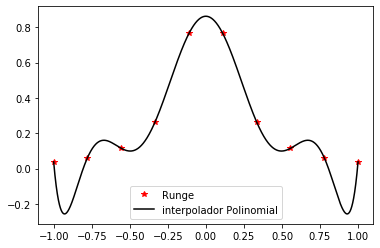

In [7]:
plt.plot(equises_10_puntos, ys_runge_10_puntos, "r*", xeval_poly, yeval_poly, "k-")
plt.legend(["Runge","interpolador Polinomial"], loc="best")

#### Usando Splines cúbicos:

Los *splines* cúbicos piecewise resuelven la no diferenciabilidad del interpolador lineal en los puntos dados:

In [8]:
from scipy.interpolate import interp1d
pw_spline = interp1d(equises_10_puntos,ys_runge_10_puntos, kind = 'cubic') #spline piecewise 
neval = 10000
yeval_splines = pw_spline(xeval_poly)
print("xeval.shape:", xeval_poly.shape[0])
print("yeval.shape:", yeval_splines.shape[0])

xeval.shape: 10000
yeval.shape: 10000


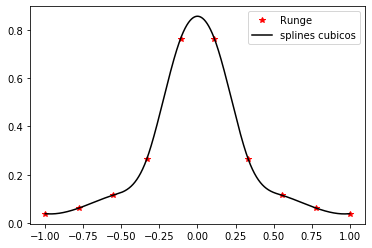

In [9]:
plt.plot(equises_10_puntos, ys_runge_10_puntos, "r*",xeval_poly, yeval_splines, "k-")
plt.legend(["Runge","splines cubicos"], loc="best")

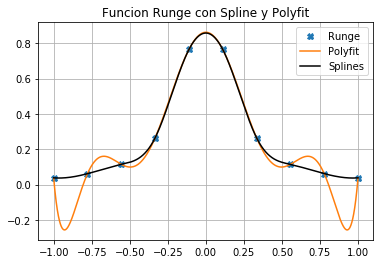

In [10]:
plt.plot(equises_10_puntos,ys_runge_10_puntos,"X",xeval_poly, yeval_poly, "-",xeval_poly, yeval_splines, "k-")

plt.title("Funcion Runge con Spline y Polyfit")
plt.legend(("Runge","Polyfit","Splines"),loc = 0) #Agregar leyendas en loc. 3
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

### 3.- Mínimos Cuadrados:

Para realizar el ajuste de mínimos cuadrados se utilizan las ecuaciones normales: $$A^TA\beta=A^Ty$$ donde: $A$ se construye con las $\phi_j$'s evaluadas en los puntos $x_i$'s, el vector $\beta$ contiene a los parámetros $\beta_j$'s a estimar y el vector $y$, la variable **respuesta**, se construye con los puntos $y_i$'s:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_m(x_n)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_{m-1}) &\phi_1(x_{m-1})&\dots&\phi_m(x_{m-1})\\
\phi_0(x_m) &\phi_1(x_m)&\dots&\phi_m(x_m)
\end{array}
\right] \in \mathbb{R}^{(m+1)x(n+1)},
\beta=
\left[\begin{array}{c}
\beta_0\\
\beta_1\\
\vdots \\
\beta_n
\end{array}
\right] \in \mathbb{R}^n,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_m
\end{array}
\right] \in \mathbb{R}^m
$$

y si $A$ es de $rank$ completo (tiene $n+1$ columnas linealmente independientes) se calcula la factorización $QR$ de $A$ : $A = QR$ y entonces: $$A^TA\beta = A^Ty$$ 

y como $A=QR$ se tiene: $A^TA = (R^TQ^T)(QR)$ y $A^T = R^TQ^T$ por lo que:

$$(R^TQ^T)(QR) \beta =  R^TQ^T y$$

y usando que $Q$ tiene columnas ortonormales:

$$R^TR\beta = R^Ty$$

Como $A$ tiene $n$ columnas linealmente independientes, la matriz $R$ es invertible por lo que $R^T$ también lo es y finalmente se tiene el sistema de ecuaciones por resolver:

$$R\beta = Q^Ty$$

### Modelo sin intercepto

Se ajusta un modelo de la forma: $f(x|\beta) = \beta_1 x$ a los datos $(x_i,y_i)$'s $\forall i=0,1,\dots,m$.

**Obs:** En este caso se elige $\phi_1(x) =x$ y no hay $\phi_0$ por lo que sólo se tiene que estimar $\beta_1$.

#### Ejemplo numérico en numpy:

**Ejercicio:** realizar el ajuste correspondiente para este caso con `QR`.

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import pprint
np.set_printoptions(precision = 2) #que se muestren sólo dos

In [12]:
np.random.seed(1989) #para reproducibilidad
mpoints = 20
x = np.random.randn(mpoints) 
y = -3*x + np.random.normal(2,1,mpoints)

##### Los datos ejemplo

Text(0.5, 1.0, 'Puntos ejemplo')

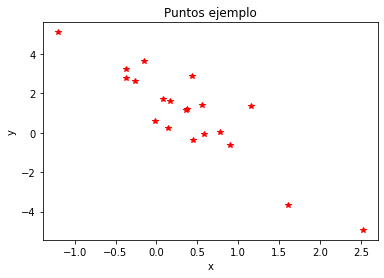

In [13]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')

##### El ajuste

Con numpy podemos usar la función `polyfit` en el paquete de `numpy` para realizar el ajuste: (ver [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

In [14]:
# el tercer argumento de polyfit especifica el grado del polinomio a ajustar. 
#Usaremos ngrado = 1 pues queremos ajustar una recta
ngrado = 1
coeficientes = np.polyfit(x,y,ngrado)

In [15]:
#Una vez realizado el llamado a la función polyfit se regresan los coeficientes de x
#ordenados del mayor grado al menor.
pprint.pprint(coeficientes)

array([-2.65,  2.03])


Entonces nuestro polinomio es: $$p_{1}(x) = -2.65x + 2.03$$

y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = 2.03$, $\hat{\beta_1} = -2.65$.

##### La gráfica

Ahora nos gustaría graficar el modelo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos obtener los valores ajustados al evaluar $p_1(x)$ los valores de $x$:

In [16]:
y_ajustadas_numpy = coeficientes[1] + coeficientes[0] * x

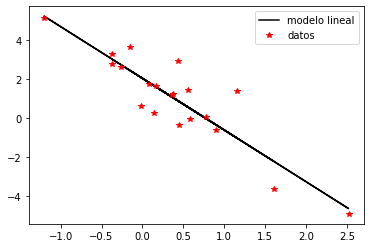

In [17]:
plt.plot(x, y_ajustadas_numpy, 'k-',x, y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')

##### También podemos obtener lo anterior con la factorización QR:

In [18]:
#construimos a la matriz A:
A=np.ones((mpoints,2))

In [19]:
A[:,1] = x 

In [20]:
A

array([[ 1.  , -0.26],
       [ 1.  ,  0.09],
       [ 1.  ,  0.43],
       [ 1.  ,  0.9 ],
       [ 1.  ,  0.56],
       [ 1.  ,  0.44],
       [ 1.  ,  0.38],
       [ 1.  , -0.15],
       [ 1.  ,  0.78],
       [ 1.  , -0.02],
       [ 1.  ,  1.61],
       [ 1.  , -0.37],
       [ 1.  ,  0.36],
       [ 1.  ,  0.17],
       [ 1.  ,  2.52],
       [ 1.  ,  0.14],
       [ 1.  ,  1.16],
       [ 1.  ,  0.59],
       [ 1.  , -1.2 ],
       [ 1.  , -0.37]])

In [21]:
Q,R = np.linalg.qr(A)

In [22]:
#Resolvemos el sistema R*beta = Q^T*y
beta = np.linalg.solve(R,Q.T@y)
pprint.pprint(beta)

array([ 2.03, -2.65])


In [23]:
y_ajustadas_QR = A@beta
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*x

Text(0.5, 1.0, 'Modelo de Minimos cuadrados con Intercepto')

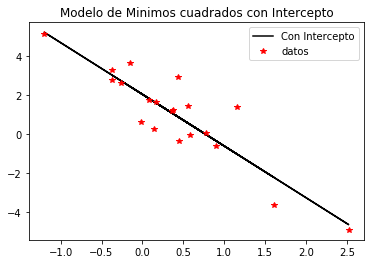

In [24]:
plt.plot(x, y_ajustadas_QR , 'k-',x, y, 'r*')
plt.legend(['Con Intercepto','datos'], loc='best')
plt.title("Modelo de Minimos cuadrados con Intercepto")

### Ajuste sin intercepto:

In [25]:
#construimos a la matriz A:
A_sin_intercepto=np.ones((mpoints,1)) #Como solo tendremos un coeficiente (el de x) no creamos uno para la B0
A_sin_intercepto[:,0] = x 
pprint.pprint(A_sin_intercepto)

array([[-0.26],
       [ 0.09],
       [ 0.43],
       [ 0.9 ],
       [ 0.56],
       [ 0.44],
       [ 0.38],
       [-0.15],
       [ 0.78],
       [-0.02],
       [ 1.61],
       [-0.37],
       [ 0.36],
       [ 0.17],
       [ 2.52],
       [ 0.14],
       [ 1.16],
       [ 0.59],
       [-1.2 ],
       [-0.37]])


In [26]:
Q,R = np.linalg.qr(A_sin_intercepto)
#Resolvemos el sistema R*beta = Q^T*y
beta_sin_intercepto = np.linalg.solve(R,Q.T@y)
pprint.pprint(beta_sin_intercepto)

array([-1.6])


In [27]:
y_ajustadas_sin_intercepto_QR = A_sin_intercepto@beta_sin_intercepto
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*x

Text(0.5, 1.0, 'Modelo de Minimos cuadrados sin Intercepto')

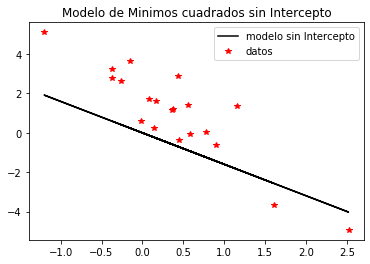

In [28]:
plt.plot(x, y_ajustadas_sin_intercepto_QR , 'k-',x, y, 'r*')
plt.legend(['modelo sin Intercepto','datos'], loc='best')
plt.title("Modelo de Minimos cuadrados sin Intercepto")

Combinando las graficas resulta:

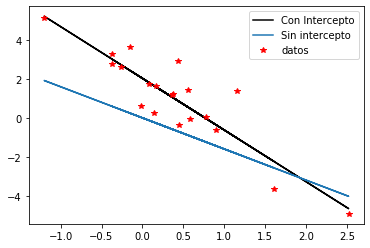

In [29]:
plt.plot(x, y_ajustadas_QR , 'k-',x, y_ajustadas_sin_intercepto_QR , '-',x, y, 'r*')
plt.legend(['Con Intercepto','Sin intercepto',"datos"], loc='best')

## Una vez hecho el ajuste...

Se realiza un análisis de residuales, se hace una gráfica el modelo si las dimensiones en las que se está trabajando lo permiten y se calcula el **error cuadrático medio**.

Si $\hat{y}_i$ es el valor ajustado para el dato $x_i$, esto es: $\hat{y}_i = f(x_i|\hat{\beta}) = \displaystyle \sum_{i=0}^m \left (y_i -\displaystyle \sum_{j=0}^n\hat{\beta}_j\phi_j(x_i)\right )^2$ el residual $i$ es: $r_i = y_i - \hat{y}_i$ y representa la discrepancia entre los datos y el modelo.

El error cuadrático medio se calcula como: $$ECM(\hat{y}) = \frac{1}{m} \displaystyle \sum_{i=0}^m(y_i-\hat{y}_i)^2$$

**Ejercicio: calcular el ECM de los ajustes anteriores**.

In [30]:
ecm = lambda y,ygorrito: sum((y-ygorrito)**2)

In [31]:
#print(y_ajustadas_numpy.dtype)
#print(y_ajustadas_QR.dtype)
#print(y_ajustadas_sin_intercepto_QR.dtype)

ecm_poly = ecm(y,y_ajustadas_numpy)
ecm_QR_con_intercepto = ecm(y,y_ajustadas_QR)
ecm_QR_sin_intercepto = ecm(y,y_ajustadas_sin_intercepto_QR)
print("ECM con Polyfit: \n",ecm_poly)
print("\n\n")
print("ECM con Factorización QR con intercepto: \n",ecm_QR_con_intercepto)
print("\n\n")
print("ECM con Factorización QR sin intercepto: \n",ecm_QR_sin_intercepto)
print("\n\n")


ECM con Polyfit: 
 20.435476838775887



ECM con Factorización QR con intercepto: 
 20.435476838775887



ECM con Factorización QR sin intercepto: 
 86.26514118733563





Por lo tanto, el modelo con factorización QR y con intercepto resulta mejor para pronosticar.

### 3_minimos_cuadrados: ajuste de un modelo por mínimos cuadrados con funciones no lineales:

## Ejemplo: ajuste de un modelo por mínimos cuadrados lineales con funciones $\phi_j$'s no lineales

Obsérvese que el modelo que se ha utilizado: $f(x|\beta) = \displaystyle \sum_{j=0}^n\beta_j\phi_j(x)$ permite elegir las $\phi_j$'s como funciones de $\mathbb{R}$ a $\mathbb{R}$. Por lo que tenemos una amplia gama de posibilidades de ajuste de curvas a datos.

Como ejemplo utilizaremos el conjunto de datos *"datos_para_ipynb_3_minimos_cuadrados.txt"* el cual lo pueden descargar en el mismo directorio de este *ipynb* o bien dando click [aquí](https://drive.google.com/file/d/1Ht7d2E1LWw7EIrrkULFQ_7-5nGVxHT4P/view?usp=sharing) y ajustaremos tres modelos de la forma:

$$f_1(x|\beta) = \beta_0 + \beta_1 \frac{x}{x+1}$$

$$f_2(x|\beta) = \beta_0 + \beta_1x + \beta_2x^2$$

$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

tomando como variable respuesta la segunda columna de los datos etiquetada como $y$.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
import math
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

In [33]:
datos = np.loadtxt('datos_para_ipynb_3_minimos_cuadrados.txt', skiprows=1)

ver: [numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

In [34]:
x = datos[:,0]
y = datos[:,1]

Text(0.5, 1.0, 'datos')

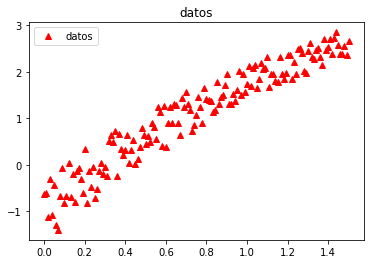

In [35]:
plt.plot(x, y, 'r^')
plt.legend(['datos'], loc='best')
plt.title('datos')

### Modelo 1

In [36]:
phi_1 = lambda var: var/(var+1)

Construimos a la matriz A como sigue:

In [37]:
mpoints, = x.shape
A_1=np.ones((mpoints,2))
A_1[:,1] = phi_1(x)

Calculamos la factorización QR y graficamos:

In [38]:
Q_1,R_1 = np.linalg.qr(A_1)
beta_1 = np.linalg.solve(R_1,Q_1.T@y)
print('beta')
pprint.pprint(beta_1)

beta
array([-1.3,  6.2])


In [39]:
y_ajustadas_QR_1 = A_1@beta_1
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*phi_1(x) 

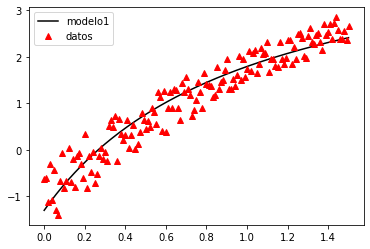

In [40]:
plt.plot(x, y_ajustadas_QR_1 , 'k-',x, y, 'r^')
plt.legend(['modelo1','datos'], loc='best')

### Modelo 2

In [41]:
#No requerimos construir A pues es un polinomio de grado2 por lo que usamos polyfit de numpy:
ngrado = 2
coeficientes_2 = np.polyfit(x,y,ngrado)

In [42]:
pprint.pprint(coeficientes_2)

array([-0.69,  3.39, -0.92])


In [43]:
y_ajustadas_numpy_2 = coeficientes_2[2] + coeficientes_2[1] * x + coeficientes_2[0] * x**2

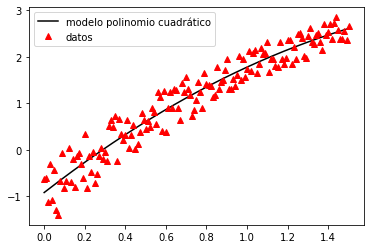

In [44]:
plt.plot(x, y_ajustadas_numpy_2, 'k-',x, y, 'r^')
plt.legend(['modelo polinomio cuadrático','datos'], loc='best')

### Modelo 3

$$f_3(x|\beta) = \beta_0 + \beta_1\text{log}(x+1)$$

**Ejercicio: ajustar el modelo 3. Calcular ECM de cada modelo y realizar en una sola gráfica los tres modelos. ¿Cuál es el modelo con menor ECM?**

In [45]:
phi_3 = lambda var: np.log(var+1)

Construimos a la matriz A como sigue:

In [46]:
mpoints, = x.shape
A_3=np.ones((mpoints,2))
A_3[:,1] = phi_3(x)

Calculamos la factorización QR y graficamos:

In [47]:
Q_3,R_3 = np.linalg.qr(A_3)
beta_3 = np.linalg.solve(R_3,Q_3.T@y)
print('beta')
pprint.pprint(beta_3)

beta
array([-0.98,  3.96])


In [48]:
y_ajustadas_QR_3 = A_3@beta_3
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*phi_1(x) 

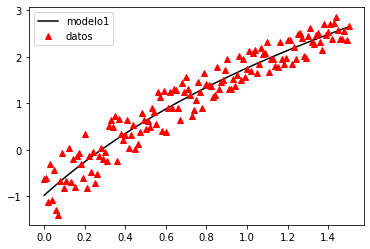

In [49]:
plt.plot(x, y_ajustadas_QR_3 , 'k-',x, y, 'r^')
plt.legend(['modelo1','datos'], loc='best')

In [50]:
ecm = lambda y,ygorrito: sum((y-ygorrito)**2)

In [51]:
ecm_mod1 = ecm(y,y_ajustadas_QR_1)
ecm_mod2 = ecm(y,y_ajustadas_numpy_2)
ecm_mod3 = ecm(y,y_ajustadas_QR_3)
print("ECM con Polyfit: \n",ecm_mod1)
print("\n\n")
print("ECM con Factorización QR con intercepto: \n",ecm_mod2)
print("\n\n")
print("ECM con Factorización QR sin intercepto: \n",ecm_mod3)
print("\n\n")


ECM con Polyfit: 
 14.656071440340163



ECM con Factorización QR con intercepto: 
 11.974386376666104



ECM con Factorización QR sin intercepto: 
 12.041297818937322





Por lo tanto, la mejor forma para ajustar los datos es con el modelo 2

Visto gráficamente:

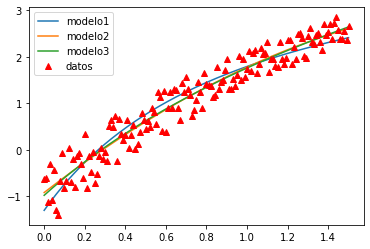

In [52]:
plt.plot(x, y_ajustadas_QR_1 , '-',x, y_ajustadas_numpy_2, '-',x, y_ajustadas_QR_3 , '-',x, y, 'r^')
plt.legend(['modelo1','modelo2','modelo3','datos'], loc='best')

### 4.- SVD y Reconstrucción de Imágenes

#### Aplicación: reconstrucción de imágenes

Dentro de las aplicaciones de la SVD de una matriz se encuentra la de reconstrucción de imágenes.

## En numpy y matplotlib ...

Tomar en cuenta: *matplotlib only supports PNG images* de acuerdo a [liga](https://matplotlib.org/users/image_tutorial.html) pero se puede instalar el paquete de [Pillow](https://pypi.org/project/Pillow/) con pip para soportar otros formatos (si usan el contenedor de docker ejecutar en la terminal: `workon propedeutico` y después `pip install pillow`)

### Usando 10, 20, 30, 40 y 50 número de vectores singulares izquierdos, derechos y valores singulares

**Ejercicio: resolver este caso**

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [54]:
img=plt.imread('isla.png')

ver: [matplotlib.pyplot.imread](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imread.html)

In [55]:
img #Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0

array([[[0.  , 0.23, 0.6 ],
        [0.  , 0.23, 0.61],
        [0.  , 0.24, 0.62],
        ...,
        [0.38, 0.44, 0.59],
        [0.36, 0.42, 0.58],
        [0.35, 0.42, 0.58]],

       [[0.  , 0.23, 0.6 ],
        [0.  , 0.23, 0.61],
        [0.  , 0.24, 0.62],
        ...,
        [0.36, 0.43, 0.58],
        [0.35, 0.42, 0.58],
        [0.33, 0.4 , 0.58]],

       [[0.  , 0.23, 0.61],
        [0.  , 0.24, 0.62],
        [0.  , 0.24, 0.62],
        ...,
        [0.36, 0.43, 0.59],
        [0.34, 0.41, 0.58],
        [0.31, 0.39, 0.56]],

       ...,

       [[0.  , 0.  , 0.12],
        [0.  , 0.  , 0.13],
        [0.  , 0.  , 0.13],
        ...,
        [0.15, 0.32, 0.55],
        [0.19, 0.38, 0.63],
        [0.18, 0.34, 0.62]],

       [[0.  , 0.  , 0.12],
        [0.  , 0.  , 0.11],
        [0.  , 0.  , 0.11],
        ...,
        [0.04, 0.18, 0.34],
        [0.12, 0.31, 0.56],
        [0.14, 0.25, 0.55]],

       [[0.  , 0.  , 0.11],
        [0.  , 0.  , 0.11],
        [0.  , 0

Los datos tienen cuatro canales:

In [56]:
img.shape

(653, 1000, 3)

Sólo usaremos uno de ellos

In [57]:
img[:,:,0].shape

(653, 1000)

In [58]:
img = img[:,:,0]

Text(0.5, 1.0, 'Imagen en escala de grises')

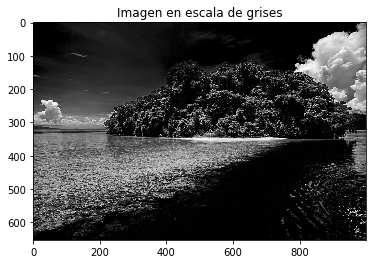

In [59]:
imgplot = plt.imshow(img, cmap='gray')
plt.title('Imagen en escala de grises')

### Aplicamos SVD a la imagen

In [60]:
U,S,V_T = np.linalg.svd(img, full_matrices=False)

In [61]:
print(U.shape)
print(S.shape)
print(V_T.shape)

(653, 653)
(653,)
(653, 1000)


In [62]:
img_svd = (U*S)@V_T

In [63]:
img_svd.shape

(653, 1000)

Text(0.5, 1.0, 'Imagen utilizando SVD')

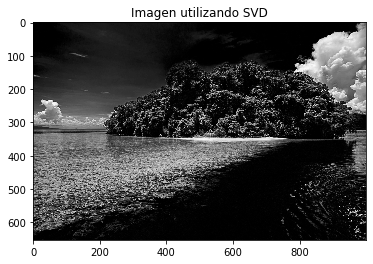

In [64]:
plt.imshow(img_svd, cmap='gray')
plt.title('Imagen utilizando SVD')

### Sólo usando 1 vector singular izquierdo, derecho y 1 valor singular

In [65]:
(U[:,1]*S[1]).shape

(653,)

In [66]:
img_svd_1=np.outer((U[:,1]*S[1]),V_T[1,:])

In [67]:
img_svd_1.shape

(653, 1000)

Text(0.5, 1.0, 'SVD truncada a 1')

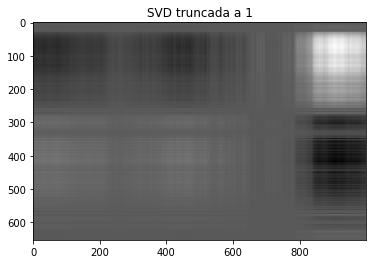

In [68]:
plt.imshow(img_svd_1, cmap='gray')
plt.title('SVD truncada a 1')

### Usando 2 vectores singulares izquierdos, derechos y 2 valores singulares

In [69]:
img_svd_2=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:])

Text(0.5, 1.0, 'SVD truncada a 2')

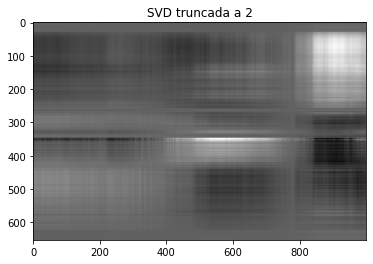

In [70]:
plt.imshow(img_svd_2, cmap='gray')
plt.title('SVD truncada a 2')

In [71]:
#10 vectores
img_svd_10=np.outer((U[:,1]*S[1]),V_T[1,:]) + np.outer((U[:,2]*S[2]),V_T[2,:]) + np.outer((U[:,3]*S[3]),V_T[3,:]) + np.outer((U[:,4]*S[4]),V_T[4,:]) + np.outer((U[:,5]*S[5]),V_T[5,:]) + np.outer((U[:,6]*S[6]),V_T[6,:]) + np.outer((U[:,7]*S[7]),V_T[7,:]) + np.outer((U[:,8]*S[8]),V_T[8,:]) + np.outer((U[:,9]*S[9]),V_T[9,:]) + np.outer((U[:,10]*S[10]),V_T[10,:])

Text(0.5, 1.0, 'SVD truncada a 10')

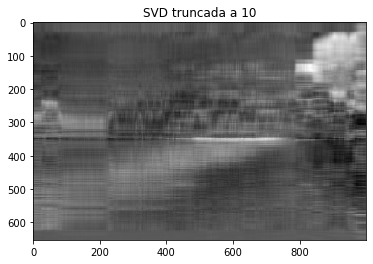

In [72]:
plt.imshow(img_svd_10, cmap='gray')
plt.title('SVD truncada a 10')

In [73]:
import truncaImagen as trui

Text(0.5, 1.0, 'SVD truncada a 20')

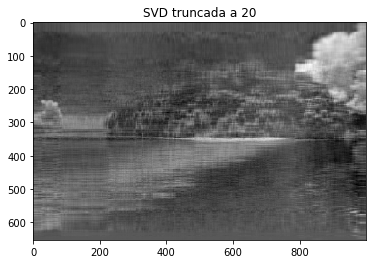

In [74]:
img_svd_20 = trui.truncaimagen(U,S,V_T,20)
plt.imshow(img_svd_20, cmap='gray')
plt.title('SVD truncada a 20')

Text(0.5, 1.0, 'SVD truncada a 30')

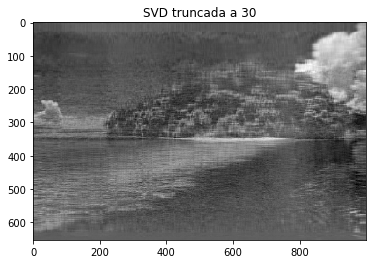

In [75]:
img_svd_30 = trui.truncaimagen(U,S,V_T,30)
plt.imshow(img_svd_30, cmap='gray')
plt.title('SVD truncada a 30')

Text(0.5, 1.0, 'SVD truncada a 40')

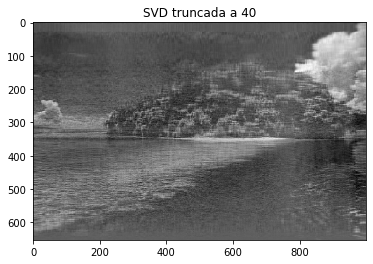

In [76]:
img_svd_40 = trui.truncaimagen(U,S,V_T,40)
plt.imshow(img_svd_40, cmap='gray')
plt.title('SVD truncada a 40')

Text(0.5, 1.0, 'SVD truncada a 50')

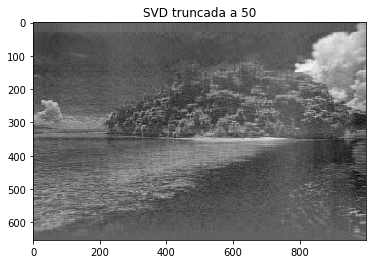

In [77]:
img_svd_50 = trui.truncaimagen(U,S,V_T,50)
plt.imshow(img_svd_50, cmap='gray')
plt.title('SVD truncada a 50')

## Parte 2: Resolver los ejercicios:


1. Ajusta por mínimos cuadrados dos modelos de la forma:
    + log(y) = log(b) + alog(x)
    + log(y) = log(b) + alog(x) + c(log(x))^2

    al conjunto de datos que se descargan de aquí. Realiza una gráfica que involucre los datos y los dos modelos. Calcula el ECM de ambos modelos y responde ¿cuál es el modelo con menor ECM?

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
import math
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren

In [79]:
datos2 = np.loadtxt('datos_para_tarea_minimos_cuadrados.txt', skiprows=1)

ver: [numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

In [80]:
x_orig = datos2[:,0]
y_orig = datos2[:,1]

Text(0.5, 1.0, 'datos')

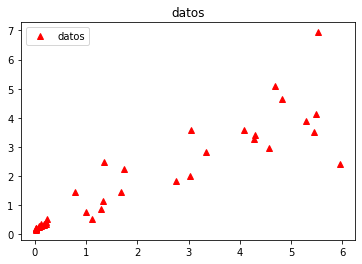

In [81]:
plt.plot(x_orig, y_orig, 'r^')
plt.legend(['datos'], loc='best')
plt.title('datos')

Convirtiendo en logaritmos:

In [82]:
log_x = np.log(datos2[:,0])
log_y = np.log(datos2[:,1])

Text(0.5, 1.0, 'datos con logaritmo')

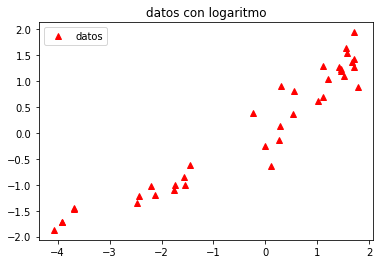

In [83]:
plt.plot(log_x, log_y, 'r^')
plt.legend(['datos'], loc='best')
plt.title('datos con logaritmo')

Se ve que los datos con logaritmo podrían ser aproximados de mejor forma.

### Modelo 1
+ log(y) = log(b) + alog(x)

In [84]:
#construimos a la matriz A:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
mpoints = len(log_x)
A_mod1=np.ones((mpoints,2))

In [85]:
A_mod1[:,1] = log_x 

In [86]:
A_mod1

array([[ 1.00e+00, -4.07e+00],
       [ 1.00e+00, -2.44e+00],
       [ 1.00e+00, -1.75e+00],
       [ 1.00e+00,  1.04e-01],
       [ 1.00e+00,  5.54e-01],
       [ 1.00e+00,  1.41e+00],
       [ 1.00e+00,  1.70e+00],
       [ 1.00e+00,  1.79e+00],
       [ 1.00e+00, -3.69e+00],
       [ 1.00e+00, -2.20e+00],
       [ 1.00e+00, -1.56e+00],
       [ 1.00e+00, -1.00e-03],
       [ 1.00e+00,  1.11e+00],
       [ 1.00e+00,  1.45e+00],
       [ 1.00e+00,  1.52e+00],
       [ 1.00e+00,  1.54e+00],
       [ 1.00e+00, -3.91e+00],
       [ 1.00e+00, -2.47e+00],
       [ 1.00e+00, -1.77e+00],
       [ 1.00e+00,  2.55e-01],
       [ 1.00e+00,  1.11e+00],
       [ 1.00e+00,  1.46e+00],
       [ 1.00e+00,  1.67e+00],
       [ 1.00e+00, -3.91e+00],
       [ 1.00e+00, -2.13e+00],
       [ 1.00e+00, -1.56e+00],
       [ 1.00e+00,  2.78e-01],
       [ 1.00e+00,  1.21e+00],
       [ 1.00e+00,  1.70e+00],
       [ 1.00e+00, -3.69e+00],
       [ 1.00e+00, -1.46e+00],
       [ 1.00e+00, -2.45e-01],
       [

In [87]:
Q,R = np.linalg.qr(A_mod1)
#print(R)
#print("\n",Q)

In [88]:
#Resolvemos el sistema R*beta = Q^T*y
beta_mod1 = np.linalg.solve(R,Q.T@log_y)
pprint.pprint(beta_mod1)

array([0.26, 0.58])


In [89]:
log_y_ajustadas_QR = A_mod1@beta_mod1
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*x

Text(0.5, 1.0, 'Modelo de Minimos cuadrados con Intercepto')

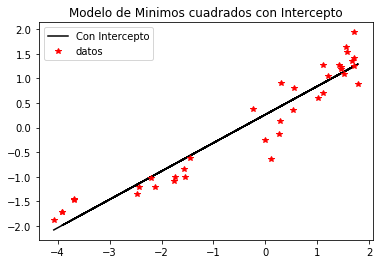

In [90]:
plt.plot(log_x, log_y_ajustadas_QR , 'k-',log_x, log_y, 'r*')
plt.legend(['Con Intercepto','datos'], loc='best')
plt.title("Modelo de Minimos cuadrados con Intercepto")

Se puede notar que la recta replica más o menos los datos, pero no de manera perfecta.

Como este modelo tiene forma de un modelo polinomial, podríamos usar polyfit

In [91]:
ngrado_log_mod1 = 1
coeficientes_log_mod1 = np.polyfit(log_x,log_y,ngrado_log_mod1)

In [92]:
#Una vez realizado el llamado a la función polyfit se regresan los coeficientes de x
#ordenados del mayor grado al menor.
pprint.pprint(coeficientes_log_mod1)

array([0.58, 0.26])


Entonces nuestro polinomio es: $$p_{1}(x) = 0.58log(x) + 0.26$$

y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = 0.26$, $\hat{\beta_1} = 0.58$.

##### La gráfica

Ahora nos gustaría graficar el modelo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos obtener los valores ajustados al evaluar $p_1(x)$ los valores de $x$:

In [93]:
y_ajustadas_numpy_log_mod1 = coeficientes_log_mod1[1] + coeficientes_log_mod1[0] * log_x

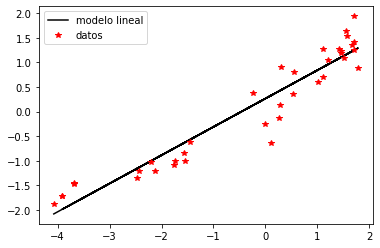

In [94]:
plt.plot(log_x, y_ajustadas_numpy_log_mod1, 'k-',log_x, log_y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')

Como lo que fué pronosticado es:  $$log(y)$$ <br>
Entonces se tiene que hacer un cambio de variable, pues el pronóstoco en sí quedaría como:<br>
$$z = e^{log(y)}$$ <br>
De modo que z sería:

In [95]:
z_QR_mod1 = np.exp(log_y_ajustadas_QR)
z_numpy_mod1 = np.exp(y_ajustadas_numpy_log_mod1)

In [96]:
print("Con el modelo de factorización QR: \n",z_QR_mod1)
print("\n\n")
print("Con el modelo de factorización QR: \n",z_numpy_mod1)
print("\n\n")

Con el modelo de factorización QR: 
 [0.12 0.32 0.48 1.38 1.79 2.93 3.46 3.64 0.16 0.37 0.53 1.3  2.46 3.01
 3.13 3.17 0.14 0.32 0.47 1.51 2.47 3.01 3.4  0.14 0.38 0.53 1.53 2.61
 3.47 0.16 0.56 1.13 1.55 1.76 2.33 3.23 3.49]



Con el modelo de factorización QR: 
 [0.12 0.32 0.48 1.38 1.79 2.93 3.46 3.64 0.16 0.37 0.53 1.3  2.46 3.01
 3.13 3.17 0.14 0.32 0.47 1.51 2.47 3.01 3.4  0.14 0.38 0.53 1.53 2.61
 3.47 0.16 0.56 1.13 1.55 1.76 2.33 3.23 3.49]





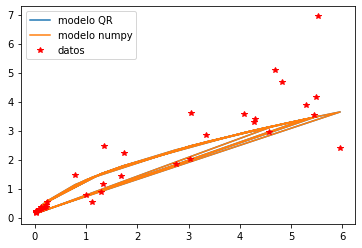

In [97]:
plt.plot(x_orig, z_QR_mod1, '-',x_orig, z_numpy_mod1, '-',x_orig, y_orig, 'r*')
plt.legend(['modelo QR','modelo numpy','datos'], loc='best')

### Modelo 2
+ log(y) = log(b) + alog(x) + c(log(x))^2

In [98]:
#construimos a la matriz A:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
mpoints = len(log_x)
A_mod2=np.ones((mpoints,3))

In [99]:
A_mod2[:,1] = log_x
A_mod2[:,2] = log_x**2 

In [100]:
A_mod2

array([[ 1.00e+00, -4.07e+00,  1.66e+01],
       [ 1.00e+00, -2.44e+00,  5.96e+00],
       [ 1.00e+00, -1.75e+00,  3.06e+00],
       [ 1.00e+00,  1.04e-01,  1.09e-02],
       [ 1.00e+00,  5.54e-01,  3.07e-01],
       [ 1.00e+00,  1.41e+00,  1.98e+00],
       [ 1.00e+00,  1.70e+00,  2.88e+00],
       [ 1.00e+00,  1.79e+00,  3.19e+00],
       [ 1.00e+00, -3.69e+00,  1.36e+01],
       [ 1.00e+00, -2.20e+00,  4.83e+00],
       [ 1.00e+00, -1.56e+00,  2.42e+00],
       [ 1.00e+00, -1.00e-03,  1.00e-06],
       [ 1.00e+00,  1.11e+00,  1.22e+00],
       [ 1.00e+00,  1.45e+00,  2.11e+00],
       [ 1.00e+00,  1.52e+00,  2.32e+00],
       [ 1.00e+00,  1.54e+00,  2.38e+00],
       [ 1.00e+00, -3.91e+00,  1.53e+01],
       [ 1.00e+00, -2.47e+00,  6.08e+00],
       [ 1.00e+00, -1.77e+00,  3.12e+00],
       [ 1.00e+00,  2.55e-01,  6.48e-02],
       [ 1.00e+00,  1.11e+00,  1.24e+00],
       [ 1.00e+00,  1.46e+00,  2.12e+00],
       [ 1.00e+00,  1.67e+00,  2.78e+00],
       [ 1.00e+00, -3.91e+00,  1.5

In [101]:
Q,R = np.linalg.qr(A_mod2)
#print(R)
#print("\n",Q)

In [102]:
#Resolvemos el sistema R*beta = Q^T*y
beta_mod2 = np.linalg.solve(R,Q.T@log_y)
pprint.pprint(beta_mod2)

array([0.05, 0.7 , 0.07])


In [103]:
log_y_ajustadas_QR_mod2 = A_mod2@beta_mod2
#obsérvese que la línea anterior es equivalente a realizar:
#y_ajustadas_QR = beta[0] + beta[1]*x

Text(0.5, 1.0, 'Modelo de Minimos cuadrados con Intercepto')

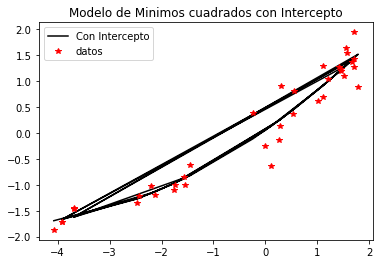

In [104]:
plt.plot(log_x, log_y_ajustadas_QR_mod2 , 'k-',log_x, log_y, 'r*')
plt.legend(['Con Intercepto','datos'], loc='best')
plt.title("Modelo de Minimos cuadrados con Intercepto")

Se puede notar que la recta replica más o menos los datos, pero no de manera perfecta.

Como este modelo tiene forma de un modelo polinomial, podríamos usar polyfit

In [105]:
ngrado_log_mod2 = 2
coeficientes_log_mod2 = np.polyfit(log_x,log_y,ngrado_log_mod2)

In [106]:
#Una vez realizado el llamado a la función polyfit se regresan los coeficientes de x
#ordenados del mayor grado al menor.
pprint.pprint(coeficientes_log_mod2)

array([0.07, 0.7 , 0.05])


Entonces nuestro polinomio es: $$p_{1}(x) =0.05log(x^2) + 0.7log(x) + 0.07$$

y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = 0.07$, $\hat{\beta_1} = 0.7$, $\hat{\beta_2} = 0.05$.

##### La gráfica

Ahora nos gustaría graficar el modelo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos obtener los valores ajustados al evaluar $p_1(x)$ los valores de $x$:

In [107]:
y_ajustadas_numpy_log_mod2 = coeficientes_log_mod2[2] + (coeficientes_log_mod2[1] * log_x) + (coeficientes_log_mod2[0] * (log_x**2))

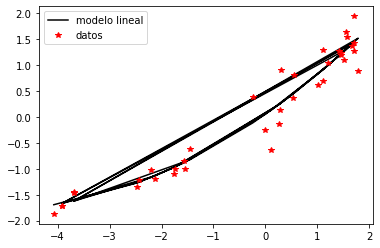

In [108]:
plt.plot(log_x, y_ajustadas_numpy_log_mod2, 'k-',log_x, log_y, 'r*')
plt.legend(['modelo lineal','datos'], loc='best')

Como lo que fué pronosticado es:  $$log(y)$$ <br>
Entonces se tiene que hacer un cambio de variable, pues el pronóstoco en sí quedaría como:<br>
$$z = e^{log(y)}$$ <br>
De modo que z sería:

In [109]:
z_QR_mod2 = np.exp(log_y_ajustadas_QR_mod2)
z_numpy_mod2 = np.exp(y_ajustadas_numpy_log_mod2)

In [110]:
print("Con el modelo de factorización QR: \n",z_QR_mod2)
print("\n\n")
print("Con el modelo de factorización QR: \n",z_numpy_mod2)
print("\n\n")

Con el modelo de factorización QR: 
 [0.18 0.28 0.38 1.13 1.58 3.22 4.18 4.54 0.2  0.31 0.42 1.05 2.47 3.35
 3.56 3.63 0.19 0.28 0.38 1.26 2.49 3.36 4.07 0.19 0.32 0.41 1.28 2.7
 4.2  0.2  0.44 0.89 1.3  1.55 2.29 3.74 4.24]



Con el modelo de factorización QR: 
 [0.18 0.28 0.38 1.13 1.58 3.22 4.18 4.54 0.2  0.31 0.42 1.05 2.47 3.35
 3.56 3.63 0.19 0.28 0.38 1.26 2.49 3.36 4.07 0.19 0.32 0.41 1.28 2.7
 4.2  0.2  0.44 0.89 1.3  1.55 2.29 3.74 4.24]





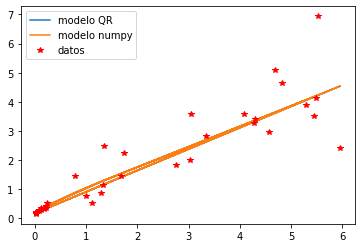

In [111]:
plt.plot(x_orig, z_QR_mod2, '-',x_orig, z_numpy_mod2, '-',x_orig, y_orig, 'r*')
plt.legend(['modelo QR','modelo numpy','datos'], loc='best')

#### Ahora calcularemos el error cuadrático medio de ambas opciones:

In [112]:
ecm = lambda y,ygorrito: sum((y-ygorrito)**2)

In [113]:
ecm_mod1_QR = ecm(y_orig,z_QR_mod1)
ecm_mod1_numpy = ecm(y_orig,z_numpy_mod1)
ecm_mod2_QR = ecm(y_orig,z_QR_mod2)
ecm_mod2_numpy = ecm(y_orig,z_numpy_mod2)
print("ECM con Factorización QR, modelo 1: \n",ecm_mod1_QR)
print("\n\n")
print("ECM con Polyfit, modelo 1: \n",ecm_mod1_numpy)
print("\n\n")
print("ECM con Factorización QR, modelo 2: \n",ecm_mod2_QR)
print("\n\n")
print("ECM con Polyfit, modelo 2: \n",ecm_mod2_numpy)
print("\n\n")


ECM con Factorización QR, modelo 1: 
 25.301841635293595



ECM con Polyfit, modelo 1: 
 25.301841635293595



ECM con Factorización QR, modelo 2: 
 20.304103842151424



ECM con Polyfit, modelo 2: 
 20.30410384215143





El ECM del modelo 2 es menor, por lo que ese modelo resulta mejor para pronosticar los valores de Y

## Parte 3: Consulta INEGI

2. Consulta la página del INEGI para obtener los datos de la población total de México en los años de 1950 a 2010 (cada 10 años) y ajusta modelos polinomiales de grados: 1, 3, 6 y spline's cúbicos. Realiza una gráfica que involucre los datos y las curvas de cada modelo. Estima la población en los años 1940, 1995 y 2020 para cada modelo y calcula tu error de estimación si la población en México en 1940 era de 19,653,552 y en 1995 de 91,158,290. Compara tu estimación para 2020 con los datos de 2018.

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import pprint
import math
np.set_printoptions(precision = 2) #que se muestren sólo dos decimales
datos3 = np.loadtxt('INEGI2.txt', skiprows=1)

In [115]:
años = datos3[:,0]
poblacion = datos3[:,1]

In [116]:
print(años)
print(poblacion)

[1950. 1960. 1970. 1980. 1990. 2000. 2010.]
[2.58e+07 3.49e+07 4.82e+07 6.68e+07 8.12e+07 9.75e+07 1.12e+08]


Ajusta modelos polinomiales de grados: 1, 3, 6 y spline's cúbicos

Text(0.5, 1.0, 'Población en México en los años')

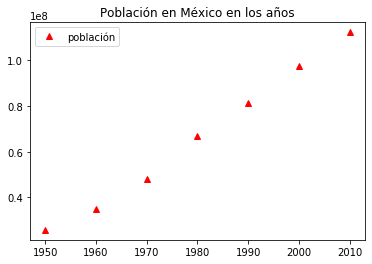

In [117]:
plt.plot(años, poblacion, 'r^')
plt.legend(['población'], loc='best')
plt.title('Población en México en los años')

### Modelo 1: modelo polinomial de grado 1

#### Usando Polyfit para el polinomio interpolador:

In [118]:
#Polinomio de grado 1:
coeficientes_grado1 = np.polyfit(años,poblacion,1)
np.set_printoptions(precision = 4) #que se muestren sólo cuatro decimales
pprint.pprint(coeficientes_grado1)

array([ 1.4921e+06, -2.8876e+09])


y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = -2.8876e+09$, $\hat{\beta_1} = 1.4921e+06$.

Entonces nuestro polinomio es: $$p_{npoints}(x) = (-2.8876e+09)x + (1.4921e+06)$$

### Modelo 2: modelo polinomial de grado 3

In [119]:
#Polinomio de grado 3:
coeficientes_grado3 = np.polyfit(años,poblacion,3)
np.set_printoptions(precision = 4) #que se muestren sólo cuatro decimales
pprint.pprint(coeficientes_grado3)

array([-2.5109e+02,  1.4956e+06, -2.9678e+09,  1.9621e+12])


y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = (1.9621e+12)$, $\hat{\beta_1} = (-2.9678e+09)$, $\hat{\beta_2} = (1.4956e+06)$, $\hat{\beta_3} = (-2.5109e+02)$.

Entonces nuestro polinomio es: $$p_{npoints}(x) = (-2.5109e+02)x^3 + (1.4956e+06)x^2 + (-2.9678e+09)x + (1.9621e+12)$$

### Modelo 3: modelo polinomial de grado 6

In [120]:
#Polinomio de grado 6:
coeficientes_grado6 = np.polyfit(años,poblacion,6)
np.set_printoptions(precision = 4) #que se muestren sólo cuatro decimales
pprint.pprint(coeficientes_grado6)

array([-7.0716e-02,  8.4017e+02, -4.1590e+06,  1.0980e+10, -1.6305e+13,
        1.2914e+16, -4.2613e+18])


y así tenemos nuestras beta's ajustadas $\hat{\beta_0} = (-4.2613e+18)$, $\hat{\beta_1} = (1.2914e+16)$, $\hat{\beta_2} = (-1.6305e+13)$,  $\hat{\beta_3} = ( 1.0980e+10)$, $\hat{\beta_4} = (-4.1590e+06)$, $\hat{\beta_5} = (8.4017e+02)$, $\hat{\beta_6} = (-7.0716e-02)$.

Entonces nuestro polinomio es: $$p_{npoints}(x) = (-7.0716e-02)x^6 + (8.4017e+02)x^5 + (-4.1590e+06)x^4 +( 1.0980e+10)x^3 + (-1.6305e+13)x^2 + (1.2914e+16)x + (-4.2613e+18)$$

#### La gráfica

Ahora nos gustaría graficarlo en el intervalo $[min(x),max(x)]$ con $min(x)$ la entrada con valor mínimo del numpy array $x$ y $max(x)$ su entrada con valor máximo.

Para lo anterior debemos evaluar $p_{npoints}(x)$ en diferentes valores de $x$. Para esto, generamos un numpy array con un número de puntos $neval$:

In [121]:
intervalo_inicio = años[0]
intervalo_fin = años[años.size-1]
n_puntos = 10000

In [122]:
equises_10000_puntos = np.linspace(intervalo_inicio,intervalo_fin,n_puntos)
#print(equises_100000_puntos)
ys_mod_grado1 = np.polyval(coeficientes_grado1,equises_10000_puntos)
ys_mod_grado3 = np.polyval(coeficientes_grado3,equises_10000_puntos)
ys_mod_grado6 = np.polyval(coeficientes_grado6,equises_10000_puntos)

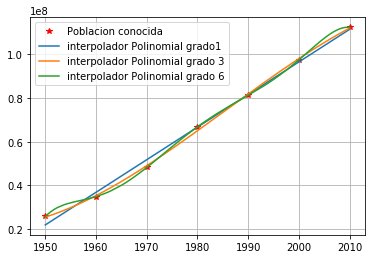

In [123]:
plt.plot(años, poblacion, "r*", equises_10000_puntos, ys_mod_grado1, "-",equises_10000_puntos, ys_mod_grado3, "-",equises_10000_puntos, ys_mod_grado6, "-")
plt.legend(["Poblacion conocida","interpolador Polinomial grado1","interpolador Polinomial grado 3","interpolador Polinomial grado 6"], loc="best")
plt.grid(True) #Agregar un grid de coordenadas
plt.show() #Mostrar la gráfica en pantalla

### Ahora calculamos para los valores solicitados:
Estima la población en los años 1940, 1995 y 2020 para cada modelo y calcula tu error de estimación si la población en México en 1940 era de 19,653,552 y en 1995 de 91,158,290. Compara tu estimación para 2020 con los datos de 2018.

In [124]:
#Inicializando los valores reales:
valor_real_1940 = 19653552
valor_real_1995 = 91158290
valor_real_2018 = 124738000 #Nota: los datos llegan hasta 2015, entonces la información de la población en México 
#para el 2018 se obtienen de: https://datosmacro.expansion.com/demografia/poblacion/mexico 

#Obteniendo el pronóstico para cada modelo
pronosticado_1940_grado1 = np.polyval(coeficientes_grado1, 1940)
pronosticado_1940_grado3 = np.polyval(coeficientes_grado3, 1940)
pronosticado_1940_grado6 = np.polyval(coeficientes_grado6, 1940)

pronosticado_1995_grado1 = np.polyval(coeficientes_grado1, 1995)
pronosticado_1995_grado3 = np.polyval(coeficientes_grado3, 1995)
pronosticado_1995_grado6 = np.polyval(coeficientes_grado6, 1995)


pronosticado_2018_grado1 = np.polyval(coeficientes_grado1, 2018)
pronosticado_2018_grado3 = np.polyval(coeficientes_grado3, 2018)
pronosticado_2018_grado6 = np.polyval(coeficientes_grado6, 2018)

#juntando los valores de cada modelo en un arreglo
pronostico_g1 = np.array([pronosticado_1940_grado1,pronosticado_1995_grado1,pronosticado_2018_grado1])
pronostico_g3 = np.array([pronosticado_1940_grado3,pronosticado_1995_grado3,pronosticado_2018_grado3])
pronostico_g6 = np.array([pronosticado_1940_grado6,pronosticado_1995_grado6,pronosticado_2018_grado6])

#Obteniendo una matriz de los valores reales
reales_val = np.array([valor_real_1940,valor_real_1995,valor_real_2018])


#### Ahora calcularemos el error cuadrático medio de cada modelo:

In [125]:
ecm = lambda y,ygorrito: sum((y-ygorrito)**2)

In [126]:
#Calculando el error cuadrático medio de cada pronóstico para cada modelo
ecm_mod_grado1 = ecm(reales_val,pronostico_g1)
ecm_mod_grado3 = ecm(reales_val,pronostico_g3)
ecm_mod_grado6 = ecm(reales_val,pronostico_g6)

print("ECM con Polinomio de grado 1: \n",ecm_mod_grado1)
print("\n\n")
print("ECM con Polinomio de grado 3: \n",ecm_mod_grado3)
print("\n\n")
print("ECM con Polinomio de grado 6: \n",ecm_mod_grado3)
print("\n\n")

ECM con Polinomio de grado 1: 
 165994793672896.94



ECM con Polinomio de grado 3: 
 19860769389438.98



ECM con Polinomio de grado 6: 
 19860769389438.98





In [127]:
print("El valor pronosticado para 1940 es:\n")
print("Polinomio de grado 1:", pronosticado_1940_grado1)
print("Polinomio de grado 3:", pronosticado_1940_grado3)
print("Polinomio de grado 6:", pronosticado_1940_grado6)

El valor pronosticado para 1940 es:

Polinomio de grado 1: 7010610.857142925
Polinomio de grado 3: 21024893.29321289
Polinomio de grado 6: -68244480.0


In [128]:
print("El valor pronosticado para 1995 es:\n")
print("Polinomio de grado 1:", pronosticado_1995_grado1)
print("Polinomio de grado 3:", pronosticado_1995_grado3)
print("Polinomio de grado 6:", pronosticado_1995_grado6)

El valor pronosticado para 1995 es:

Polinomio de grado 1: 89074841.14285755
Polinomio de grado 3: 90138305.9663086
Polinomio de grado 6: 88493568.0


In [129]:
print("El valor pronosticado para 2018 es:\n")
print("Polinomio de grado 1:", pronosticado_2018_grado1)
print("Polinomio de grado 3:", pronosticado_2018_grado3)
print("Polinomio de grado 6:", pronosticado_2018_grado6)

El valor pronosticado para 2018 es:

Polinomio de grado 1: 123392610.17142963
Polinomio de grado 3: 120622198.13183594
Polinomio de grado 6: 69811200.0


In [130]:
def error_relativo(valorReal, pronosticado):
    return abs(pronosticado - valorReal)/abs(valorReal)

print("El Error Relativo con Polinomio de grado 1 para 1940: \n",error_relativo(valor_real_1940,pronosticado_1940_grado1))
print("\n\n")
print("El Error Relativo con Polinomio de grado 3 para 1940: \n",error_relativo(valor_real_1940,pronosticado_1940_grado3))
print("\n\n")
print("El Error Relativo con Polinomio de grado 6 para 1940: \n",error_relativo(valor_real_1940,pronosticado_1940_grado6))
print("\n\n")

print("El Error Relativo con Polinomio de grado 1 para 1995: \n",error_relativo(valor_real_1940,pronosticado_1995_grado1))
print("\n\n")
print("El Error Relativo con Polinomio de grado 3 para 1995: \n",error_relativo(valor_real_1940,pronosticado_1995_grado3))
print("\n\n")
print("El Error Relativo con Polinomio de grado 6 para 1995: \n",error_relativo(valor_real_1940,pronosticado_1995_grado6))
print("\n\n")

print("El Error Relativo con Polinomio de grado 1 para 2018: \n",error_relativo(valor_real_1940,pronosticado_2018_grado1))
print("\n\n")
print("El Error Relativo con Polinomio de grado 3 para 2018: \n",error_relativo(valor_real_1940,pronosticado_2018_grado3))
print("\n\n")
print("El Error Relativo con Polinomio de grado 6 para 2018: \n",error_relativo(valor_real_1940,pronosticado_2018_grado6))
print("\n\n")

El Error Relativo con Polinomio de grado 1 para 1940: 
 0.643290390605071



El Error Relativo con Polinomio de grado 3 para 1940: 
 0.06977574807917117



El Error Relativo con Polinomio de grado 6 para 1940: 
 4.472373848757721



El Error Relativo con Polinomio de grado 1 para 1995: 
 3.532251531064591



El Error Relativo con Polinomio de grado 3 para 1995: 
 3.5863620971063446



El Error Relativo con Polinomio de grado 6 para 1995: 
 3.5026755468935082



El Error Relativo con Polinomio de grado 1 para 2018: 
 5.278387243762839



El Error Relativo con Polinomio de grado 3 para 2018: 
 5.137424834545732



El Error Relativo con Polinomio de grado 6 para 2018: 
 2.552090736575251





#### Usando Splines cúbicos:

Los *splines* cúbicos piecewise resuelven la no diferenciabilidad del interpolador lineal en los puntos dados:

In [131]:
from scipy.interpolate import interp1d
datos4 = np.loadtxt('INEGI2.txt', skiprows=1)
años = datos4[:,0]
poblacion = datos4[:,1]
intervalo_inicio = años[0]
intervalo_fin = años[años.size-1]
n_puntos = 10000
equises_10000_puntos = np.linspace(intervalo_inicio,intervalo_fin,n_puntos)
pw_spline = interp1d(años,poblacion, kind = 'cubic',fill_value="extrapolate") #spline piecewise 
neval_splines_inegi = 10000
yeval_splines_inegi = pw_spline(equises_10000_puntos)
print("xeval.shape:", equises_10000_puntos.shape[0])
print("yeval.shape:", yeval_splines_inegi.shape[0])

xeval.shape: 10000
yeval.shape: 10000


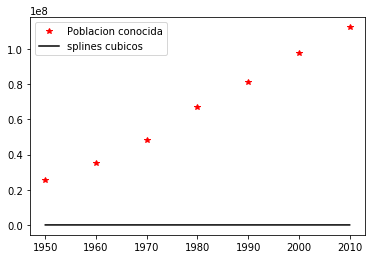

In [132]:
plt.plot(años, poblacion, "r*",equises_10000_puntos, yeval_splines, "k-")
plt.legend(["Poblacion conocida","splines cubicos"], loc="best")

In [133]:
pronostico_1940_splines = pw_spline(1940)
pronostico_1995_splines = pw_spline(1995)
pronostico_2018_splines = pw_spline(2018)

In [134]:
print("El valor pronosticado para 1940 con splines es:\n", pronostico_1940_splines)
print("El Error Relativo con splines cubicos para 1940: \n",error_relativo(valor_real_1940,pronostico_1940_splines))
print("\n\n")
print("El valor pronosticado para 1995 con splines es:\n", pronostico_1995_splines)
print("El Error Relativo con splines cubicos para 1995: \n",error_relativo(valor_real_1995,pronostico_1995_splines))
print("\n\n")
print("El valor pronosticado para 2018 con splines es:\n", pronostico_2018_splines)
print("El Error Relativo con splines cubicos para 2018: \n",error_relativo(valor_real_2018,pronostico_2018_splines))
print("\n\n")

El valor pronosticado para 1940 con splines es:
 15537810.642857172
El Error Relativo con splines cubicos para 1940: 
 0.20941463187635642



El valor pronosticado para 1995 con splines es:
 89101821.60267858
El Error Relativo con splines cubicos para 1995: 
 0.02255931300731308



El valor pronosticado para 2018 con splines es:
 118523267.21599996
El Error Relativo con splines cubicos para 2018: 
 0.049822289791403095





Por lo tanto, los splines cubicos nos ayudan a predecir los datos del crecimiento demográfico en México de mejor manera.